In [ ]:
import pandas as pd
def load_prepare_data(path):
  """
  Función para cargar y procesar datos para el ejercicio.
  """
  df = pd.read_csv(path,sep=",")
  map_classes = {
    "religion":1,
    "age":1,
    "ethnicity":1,
    "gender":1,
    "other_cyberbullying":1,
    "not_cyberbullying":0,
  }
  df["cyberbullying"] = df.cyberbullying_type.map(map_classes)
  return df[["tweet_text","cyberbullying"]].copy()

# Ejercicio


En este ejercicio vamos a trabajar con un conjunto de datos procedente de medios sociales online.

Uno de los mayores problemas en el internet de hoy en día es la presencia de actitudes negativas hacia algunos colectivos en relación a su etnia, género, religión o ideología política. En este ejercicio trabajaremos con un conjunto de datos reales, etiquetados manualmente, procedentes de la plataforma [Kaggle](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data). Originalmente, a cada documento del dataset se le asignó una de las siguientes categorías:
- *religion*
- *age*
- *ethnicity*
- *gender*
- *other_cyberbullying*
- *not_cyberbullying*


El objetivo inicial del dataset era su uso para entrenar un modelo capaz de detectar el tipo de contenido de odio presente en internet según el colectivo al que se atacaba. En este caso, para simplificar el ejercicio, se ha generado una función `load_prepare_data()` que cambia las categorías del dataset obteníendose al final 2 categorías con valor 1 o 0, indicando si el tweet tiene contenido de odio

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. Será necesario incorporar características adicionales como el sentimiento o características léxicas.

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


**Nota 1**: El ejercicio propuesto es similar a los ejercicios de clasificación visto en clase, por lo que es importante que documentéis y expliquéis adecuadamente (con vuestras palabras) los procesos llevados a cabo en el ejercicio. No hacerlo puede llegar a penalizar hasta 1 punto en la calificación final.

**Nota 2**: Cualquier cálculo adicional a los vistos en clase (visualizaciones, nuevas características añadidas al modelo...) será valorado positivamente en la calificación.

## 0. Imports


In [ ]:
import pandas as pd

## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `load_prepare_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [ ]:
path_data = "https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/cyberbullying_tweets.csv"
# Path de datos alternativos en caso de que el anterior no funcione (al estar alojado en github puede haber limitaciones
# en la descarga.
# path_data = "https://zenodo.org/records/10938455/files/cyberbullying_tweets.csv?download=1"
dataset = load_prepare_data(path_data)

In [ ]:
dataset.head(4)

,tweet_text,cyberbullying
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0


## 2. Análisis exploratorio

In [ ]:
dataset.head(3)

,tweet_text,cyberbullying
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0


In [ ]:
# Muestro tweets marcado como 0 y como 1
dataset_cyber_1 = dataset.loc[dataset['cyberbullying'] == 1]
dataset_cyber_0 = dataset.loc[dataset['cyberbullying'] == 0]
# dataset_cyber_0 #estos NO son cyberbullying
# dataset_cyber_1 #estos SI son cyberbullying
del dataset_cyber_1, dataset_cyber_0


In [ ]:
dataset.dtypes

tweet_text       object
cyberbullying     int64
dtype: object

### Palabras más comunes

In [ ]:
corpus_tok = [i.split() for i in dataset['tweet_text']]
corpus_tok[0]

['In',
 'other',
 'words',
 '#katandandre,',
 'your',
 'food',
 'was',
 'crapilicious!',
 '#mkr']

In [ ]:
# Listo todas las palabras
lista_todas_palabras = []
for frase in corpus_tok:
  for palabra in frase:
    lista_todas_palabras.append(palabra)
lista_todas_palabras[:5]

['In', 'other', 'words', '#katandandre,', 'your']

In [ ]:
from collections import Counter
contador_frecuencia = Counter(lista_todas_palabras)


Cuento las repeticiones de las palabras más comunes

In [ ]:
resultados_mas_comunes = contador_frecuencia.most_common(50)
resultados_mas_comunes = dict(resultados_mas_comunes)
resultados_mas_comunes

{'the': 27563,
 'a': 23320,
 'to': 22697,
 'and': 19689,
 'I': 16039,
 'of': 15011,
 'in': 14042,
 'you': 14030,
 'is': 13190,
 'that': 10338,
 'are': 8451,
 'for': 8191,
 'school': 6679,
 'was': 6326,
 'me': 6284,
 'not': 6280,
 'my': 5845,
 'it': 5780,
 'on': 5746,
 'be': 5250,
 'like': 5249,
 'with': 5147,
 'who': 5086,
 'but': 5034,
 'about': 4748,
 'high': 4645,
 'have': 4630,
 'this': 4607,
 'they': 4576,
 'dumb': 4387,
 'bullied': 4266,
 'as': 4198,
 'RT': 4188,
 'i': 4180,
 'all': 4137,
 'just': 3852,
 'people': 3792,
 'your': 3785,
 'so': 3640,
 'at': 3471,
 'u': 3241,
 'or': 3196,
 'by': 3153,
 'rape': 3021,
 'fuck': 3019,
 'if': 2855,
 'when': 2827,
 'one': 2786,
 'from': 2779,
 'he': 2726}

In [ ]:
dict_freq_order = sorted(resultados_mas_comunes.items(), key=lambda x: x[1], reverse=True)
token_names = list()
token_freqs = list()
for i in dict_freq_order:
  if i[1] > 30:
    token_names.append(i[0])
    token_freqs.append(i[1])

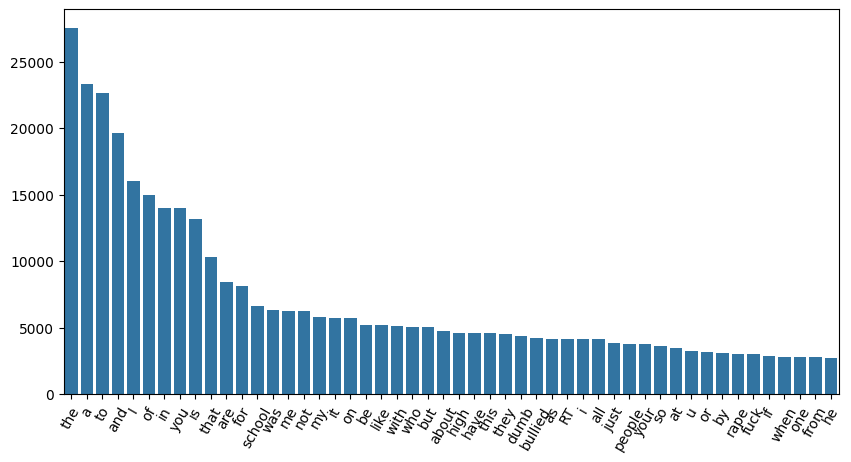

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
sns_g = sns.barplot(x=token_names, y=token_freqs)
plt.xticks(rotation=60)
plt.show()

Vemos que los tres primeros sustantivos que aparecen son school, dumb y bullied. Lo grafico sin stopwords

In [ ]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
punctuations = string.punctuation
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# repetimos el proceso quitando quitando simbolos y stop_words

resultados_mas_comunes = contador_frecuencia.most_common(120)
resultados_mas_comunes = dict(resultados_mas_comunes)

dict_freq_order = sorted(resultados_mas_comunes.items(), key=lambda x: x[1], reverse=True)
token_names = list()
token_freqs = list()
for i in dict_freq_order:
    if i[0] not in stop_words:
      token_names.append(i[0])
      token_freqs.append(i[1])

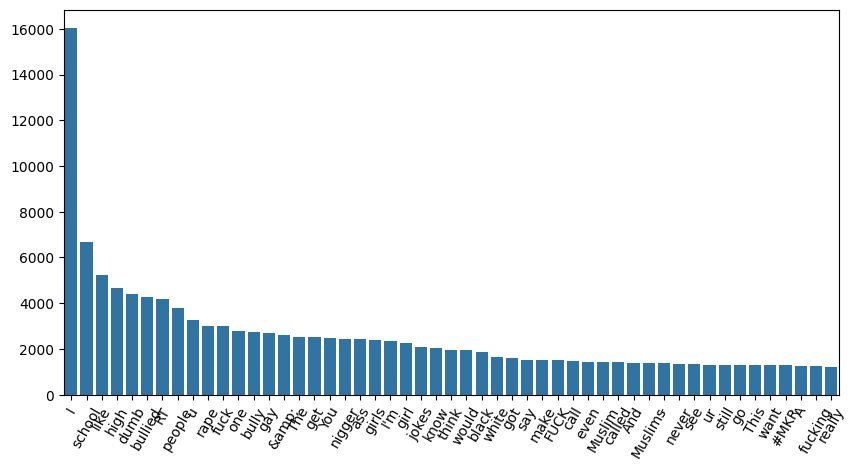

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
sns_g = sns.barplot(x=token_names, y=token_freqs)
plt.xticks(rotation=60)
plt.show()

### Distribución de caracteres

In [ ]:
import numpy as np

# Buscamos tweets duplicados
print("Existen {} documentos duplicadas".format(np.sum(dataset.duplicated(subset=["tweet_text"]))))

Existen 1675 documentos duplicadas


In [ ]:
# Los eliminamos
print("Antes de quitar duplicados tenemos un conjunto de {} tweets".format(dataset.shape[0]))
dataset = dataset.drop_duplicates()
print("Despues de quitar duplicados tenemos un conjunto de {} tweets".format(dataset.shape[0]))

Antes de quitar duplicados tenemos un conjunto de 47692 tweets
Despues de quitar duplicados tenemos un conjunto de 47526 tweets


In [ ]:
# Comprobamos nulos
print("Hay {} valores vacíos en la columna de tweets y {} valores vacíos en la columna bulliying".format(np.sum(dataset.isnull())[0],
                                                                                                        np.sum(dataset.isnull())[1]))

Hay 0 valores vacíos en la columna de tweets y 0 valores vacíos en la columna bulliying


* **Distribución de la longitud de los tweet en caracteres:**


In [ ]:
dataset["char_len"] = dataset['tweet_text'].apply(len)

<Figure size 1400x1200 with 0 Axes>

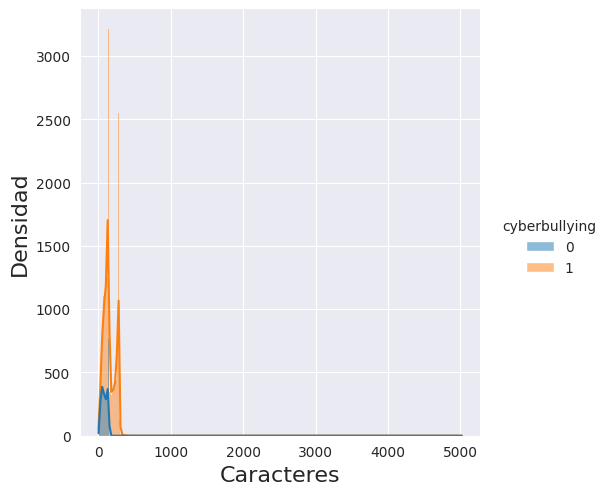

In [ ]:
# Importamos las librerías matplotlib y seaborn:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")

sns.displot(data=dataset, x="char_len", hue="cyberbullying", kde=True, legend=True)
# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()

Hay algo raro. Los tweets tienen una longitud máxima

In [ ]:
dataset_mas_280 = dataset.loc[dataset['char_len'] > 281]
primer_tweet = dataset_mas_280.iloc[0]['tweet_text']
print(primer_tweet)

@EurekAlertAAAS: Researchers push to import top anti-bullying program to US schools http://t.co/UPZrMbl
@NomCookiesNom Instead of personal attacks, maybe you can explain why there are more than 100 Islamic terrorist groups.
@_Finessinfool yea imma bring in tomorrow
#mkr I think Colin might not be a fan of the meatballs.
@KatieBatterman yeah, we should talk. I was just about to send an email over to them right before I was told it was retracted.
I'm not a fan of the bears from QLD. 💩 #MKR
@eDRoaCH @orvtech this isn't de-anonymizing. the phone # wouldn't necessarily be stored. no names would be required.
@owlcity hey adam :) I've been to 2 of your concerts &amp; haven't been allowed to meet you. when will I be able to?
Me: The boat or the thing that melts Nazi faces?
Watching a video of the snowman play from primary school! Go Tanners Wood haha #oldschool
@eranubuwah @352_7538 Taking tiny villages while loosing major cities like Tikrit.
Sofro Bulling No Chat u_u
@greenlinerzjm The best M

In [ ]:
dataset_mas_280.shape

(646, 3)

Estos tweets se componen de muchos tweets. No valen. Los elimino, solo hay 646

In [ ]:
# listo los ID
ids_a_eliminar = dataset_mas_280.index.tolist()
ids_a_eliminar[:5]

[1317, 3030, 4846, 8043, 8113]

In [ ]:
# Elimino los ID en el df original
print(dataset.shape)
dataset = dataset.drop(ids_a_eliminar)
print(dataset.shape)

(47526, 3)
(46880, 3)


<Figure size 1400x1200 with 0 Axes>

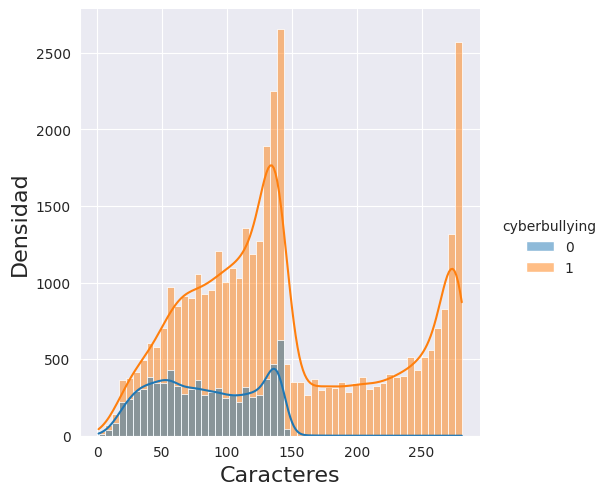

In [ ]:
# Repetimos el grafico
fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")

sns.displot(data=dataset, x="char_len", hue="cyberbullying", kde=True, legend=True)
# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()

Sospecho de valores incorrectos entre los 140 y los 280. Originalmente tweeter limitaba los caracteres a 140 pero más tarde se amplió a 280. Sospecho de ellos porque [casi] todos están marcados como cyberbullying

In [ ]:
# Muestro los char_len > 140 con cyberbullying = 1
filtrado_si_bull = dataset[(dataset['cyberbullying'] == 1) & (dataset['char_len'] > 140)]
filtrado_no_bull = dataset[(dataset['cyberbullying'] == 0) & (dataset['char_len'] > 140)]

print(filtrado_si_bull.shape)
print(filtrado_no_bull.shape)

# Mostrar el DataFrame filtrado


(14081, 3)
(86, 3)


Conclusiones sobre los tweets de más de 140 caracteres:

- Hay 87 tweets marcados como NO cyberbyllying frente a 14081. Una muestra desproporcionadamente desbalanceada.
-Los tweets marcados como NO cyberbullying son concatenación de, al menos, dos tweets.

Sospecho que los datos no son correctos y decido eliminar los que tienen más de 140 caracteres.

In [ ]:
filtro = dataset['char_len'] > 140
filtro

0        False
1        False
2        False
3        False
4        False
         ...  
47687     True
47688     True
47689    False
47690    False
47691    False
Name: char_len, Length: 46880, dtype: bool

In [ ]:
dataset = dataset.drop(dataset[filtro].index)
del filtro
dataset

,tweet_text,cyberbullying,char_len
0,"In other words #katandandre, your food was cra...",0,61
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,115
2,@XochitlSuckkks a classy whore? Or more red ve...,0,60
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,103
4,@RudhoeEnglish This is an ISIS account pretend...,0,103
...,...,...,...
47685,@KeithBishop64 Very true. It was a nice show t...,1,121
47686,@YourFavWhiteGuy shut the fuck upAbout your du...,1,90
47689,I swear to God. This dumb nigger bitch. I have...,1,104
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1,90


<Figure size 1400x1200 with 0 Axes>

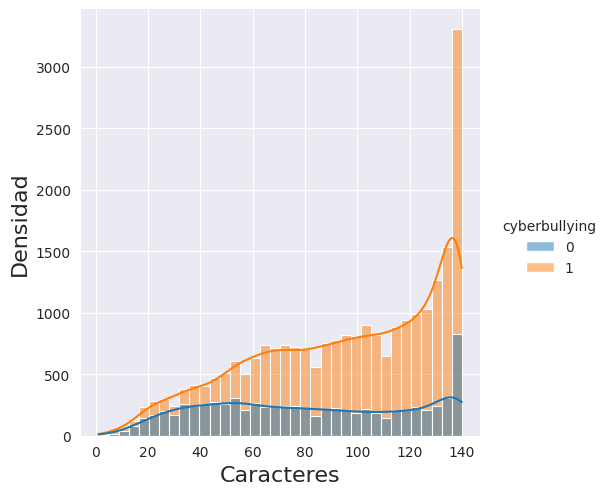

In [ ]:
# Repetimos el grafico
fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")

sns.displot(data=dataset, x="char_len", hue="cyberbullying", kde=True, legend=True)
# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()

Las cadenas cortas tienen menor probabilidad de sea 1 La longitud es una caracteristica importante y la implementaremos en el modelo

Busco strings vacias

In [ ]:
filtro = dataset['char_len'] == 0
print(filtro.sum())
del filtro

0


### World Cloud

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
txt_cat0 = ",".join(dataset[dataset.cyberbullying==0].tweet_text.to_list())
txt_cat1 = ",".join(dataset[dataset.cyberbullying==1].tweet_text.to_list())

en_stopwords = stopwords.words('english')

wordcloud = WordCloud(background_color="white", max_words=500, contour_width=0,
                      contour_color='steelblue', stopwords=en_stopwords,
                      normalize_plurals = True)

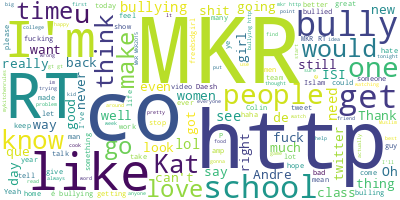

In [ ]:
# Genera el wordcloud
wordcloud.generate(txt_cat0)
# Visualizalo en una imagen
wordcloud.to_image()

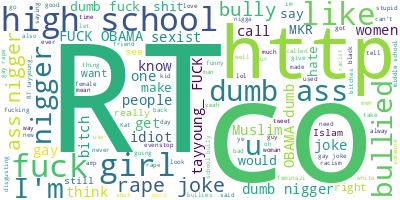

In [ ]:
# Genera el wordcloud
wordcloud.generate(txt_cat1)
# Visualizalo en una imagen
wordcloud.to_image()

Por curiosidad, hago un words cloud de bi-gramas con ayuda de chatgpt

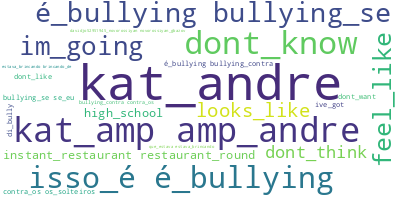

In [ ]:
from nltk import bigrams
import re

# Obtener texto de la categoría 0 y 1
txt_cat0 = ",".join(dataset[dataset.cyberbullying == 0].tweet_text.to_list())
txt_cat1 = ",".join(dataset[dataset.cyberbullying == 1].tweet_text.to_list())

# Definir stopwords en inglés
en_stopwords = set(stopwords.words('english'))

# Función para limpiar texto y obtener bigramas
def clean_text_and_get_bigrams(text):
    # Eliminar caracteres especiales y convertir a minúsculas
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Dividir el texto en palabras
    words = text.split()
    # Filtrar stopwords y obtener bigramas
    bigram_list = list(bigrams([word for word in words if word not in en_stopwords]))
    return bigram_list

# Obtener bigramas para cada categoría
bigrams_cat0 = clean_text_and_get_bigrams(txt_cat0)
bigrams_cat1 = clean_text_and_get_bigrams(txt_cat1)

# Convertir lista de bigramas a texto separado por espacios
text_bigrams_cat0 = " ".join(["_".join(bigram) for bigram in bigrams_cat0])
text_bigrams_cat1 = " ".join(["_".join(bigram) for bigram in bigrams_cat1])

# Configurar WordCloud para bigramas
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=0,
                      contour_color='steelblue', stopwords=en_stopwords,
                      normalize_plurals=True)

# Generar wordcloud para cada categoría
wordcloud.generate(text_bigrams_cat0)
wordcloud.to_image()

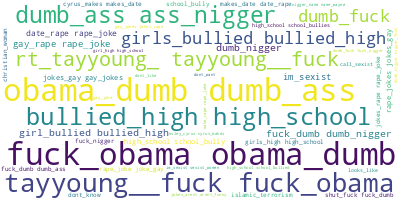

In [ ]:
wordcloud.generate(text_bigrams_cat1)
wordcloud.to_image()

No entiendo por qué hay palabras y bigramas duplicados. Pero es interesante ver ambos world clouds

## 3. Preprocesado y Normalización


Dado que las mayusculas aportan cierto enfasis a un tweet, podríamos tratar de añadir alguna marca si la palabra está en mayusculas. Lo dejo como punto de mejora del proyecto


In [ ]:
# En los apuntes se muestra que hay que eliminar los espacios extra entre palabras pero eso lo hace la función split() automaticamente
from tqdm import tqdm
tqdm.pandas()

def texto_to_lower(text):
  return text.lower()
dataset["normalized"] = dataset["tweet_text"].progress_apply(lambda x: texto_to_lower(x))
dataset

100%|██████████| 32713/32713 [00:00<00:00, 676509.32it/s]


,tweet_text,cyberbullying,char_len,normalized
0,"In other words #katandandre, your food was cra...",0,61,"in other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,115,why is #aussietv so white? #mkr #theblock #ima...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,60,@xochitlsuckkks a classy whore? or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,103,"@jason_gio meh. :p thanks for the heads up, b..."
4,@RudhoeEnglish This is an ISIS account pretend...,0,103,@rudhoeenglish this is an isis account pretend...
...,...,...,...,...
47685,@KeithBishop64 Very true. It was a nice show t...,1,121,@keithbishop64 very true. it was a nice show t...
47686,@YourFavWhiteGuy shut the fuck upAbout your du...,1,90,@yourfavwhiteguy shut the fuck upabout your du...
47689,I swear to God. This dumb nigger bitch. I have...,1,104,i swear to god. this dumb nigger bitch. i have...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1,90,yea fuck you rt @therealexel: if youre a nigge...


A continuación normalizamos las contracciones y slang existentes en inglés:

In [ ]:
# Reemplazar contractions usando la librería "contractions" https://github.com/kootenpv/contractions
!pip install contractions
import contractions

def replace_contraction(text):
    return contractions.fix(text, slang=True)
dataset["normalized"] = dataset["normalized"].progress_apply(lambda x: replace_contraction(x))
dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.1 MB/s eta 0:00:00


100%|██████████| 32713/32713 [00:00<00:00, 44603.10it/s]


,tweet_text,cyberbullying,char_len,normalized
0,"In other words #katandandre, your food was cra...",0,61,"in other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,115,why is #aussietv so white? #mkr #theblock #ima...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,60,@xochitlsuckkks a classy whore? or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,103,"@jason_gio meh. :p thanks for the heads up, b..."
4,@RudhoeEnglish This is an ISIS account pretend...,0,103,@rudhoeenglish this is an isis account pretend...
...,...,...,...,...
47685,@KeithBishop64 Very true. It was a nice show t...,1,121,@keithbishop64 very true. it was a nice show t...
47686,@YourFavWhiteGuy shut the fuck upAbout your du...,1,90,@yourfavwhiteguy shut the fuck upabout your du...
47689,I swear to God. This dumb nigger bitch. I have...,1,104,i swear to god. this dumb nigger bitch. i have...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1,90,yea fuck you rt @therealexel: if you are a nig...


Después normalizamos URLs (tokens que comienzan por https:), menciones de twitter (tokens que comienzan por @) y números. También se podría hacer con la libreria "regex" , vamos a optar por tokenizar el documento manualmente.

In [ ]:
# Tokenizador
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

def normalizar_tokens(documento):
    # Dividir el documento en palabras
    palabras =  tweet_tokenizer.tokenize(documento)

    # Reemplazar URLs, menciones de Twitter y números por los tokens correspondientes
    for i in range(len(palabras)):
        if palabras[i].startswith("http://") or palabras[i].startswith("https://") or palabras[i].startswith("www."):
            palabras[i] = "URL"
        elif palabras[i].startswith("@"):
            palabras[i] = "MENTION"
        elif palabras[i].isdigit():
            palabras[i] = "NUM"

    # Unir las palabras de nuevo en un documento modificado
    documento_modificado = ' '.join(palabras)

    return documento_modificado

In [ ]:
dataset["normalized"] = dataset["normalized"].progress_apply(lambda x: normalizar_tokens(x))
dataset

100%|██████████| 32713/32713 [00:09<00:00, 3628.44it/s]


,tweet_text,cyberbullying,char_len,normalized
0,"In other words #katandandre, your food was cra...",0,61,"in other words #katandandre , your food was cr..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,115,why is #aussietv so white ? #mkr #theblock #im...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,60,MENTION a classy whore ? or more red velvet cu...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,103,"MENTION meh . :p thanks for the heads up , but..."
4,@RudhoeEnglish This is an ISIS account pretend...,0,103,MENTION this is an isis account pretending to ...
...,...,...,...,...
47685,@KeithBishop64 Very true. It was a nice show t...,1,121,MENTION very true . it was a nice show to watc...
47686,@YourFavWhiteGuy shut the fuck upAbout your du...,1,90,MENTION shut the fuck upabout your dumb as app...
47689,I swear to God. This dumb nigger bitch. I have...,1,104,i swear to god . this dumb nigger bitch . i ha...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1,90,yea fuck you rt MENTION : if you are a nigger ...


Lematizamos y eliminación puntuación y stopwords:

In [ ]:
# encontrado esta web de divulgación de spacy:
# https://medium.com/analytics-vidhya/spacy-pipelines-a-beginners-odyssey-f68977e0311a
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lematizar_eliminacion_tokens(texto):
    # Procesar el texto con el objeto nlp
    doc = nlp(texto)

    # Lematizar el texto
    lemas = [token.lemma_ for token in doc]

    # Eliminar símbolos de puntuación y stopwords
    tokens_filtrados = [token for token in lemas if token.isalpha() and token.lower() not in en_stopwords]

    # Unir los tokens filtrados en un nuevo texto
    texto_procesado = ' '.join(tokens_filtrados)

    return texto_procesado

In [ ]:
# 10'.

dataset["preprocessed_text"] = dataset["normalized"].progress_apply(lambda x: lematizar_eliminacion_tokens(x))
dataset


100%|██████████| 32713/32713 [04:02<00:00, 134.87it/s]


Rehago el words cloud

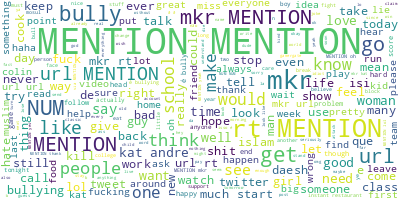

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
txt_cat0 = ",".join(dataset[dataset.cyberbullying==0].preprocessed_text.to_list())
txt_cat1 = ",".join(dataset[dataset.cyberbullying==1].preprocessed_text.to_list())

en_stopwords = stopwords.words('english')

wordcloud = WordCloud(background_color="white", max_words=500, contour_width=0,
                      contour_color='steelblue', stopwords=en_stopwords,
                      normalize_plurals = True)
# Genera el wordcloud
wordcloud.generate(txt_cat0)
# Visualizalo en una imagen
wordcloud.to_image()

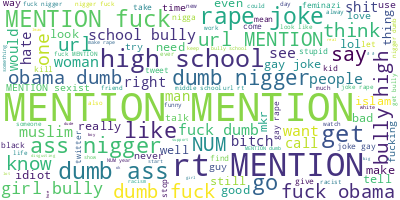

In [ ]:
# Genera el wordcloud
wordcloud.generate(txt_cat1)
# Visualizalo en una imagen
wordcloud.to_image()

Me sigue sorprendiendo que se repitan palabras

Antes de seguir voy a limpiar el data set e implementar alguna caracteristica adicional

In [ ]:
dataset.head(2)

,tweet_text,cyberbullying,char_len,normalized,preprocessed_text
0,"In other words #katandandre, your food was cra...",0,61,"in other words #katandandre , your food was cr...",word katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,115,why is #aussietv so white ? #mkr #theblock #im...,aussietv white mkr theblock imacelebrityau tod...


In [ ]:
del dataset['tweet_text'], dataset['normalized']

In [ ]:
dataset.head(2)

,cyberbullying,char_len,preprocessed_text
0,0,61,word katandandre food crapilicious mkr
1,0,115,aussietv white mkr theblock imacelebrityau tod...


In [ ]:
def token_appearance(document, token = "MENTION"):
  return len([x for x in document.split() if x == token])
dataset["num_mention"] = dataset["preprocessed_text"].progress_apply(lambda x: token_appearance(x, token="MENTION"))
dataset["num_URLS"] = dataset["preprocessed_text"].progress_apply(lambda x: token_appearance(x, token="URL"))
dataset["num_NUM"] = dataset["preprocessed_text"].progress_apply(lambda x: token_appearance(x, token="NUM"))
dataset

100%|██████████| 32713/32713 [00:00<00:00, 335298.74it/s]


,cyberbullying,char_len,preprocessed_text,num_mention,num_URLS,num_NUM
0,0,61,word katandandre food crapilicious mkr,0,0,0
1,0,115,aussietv white mkr theblock imacelebrityau tod...,0,0,0
2,0,60,MENTION classy whore red velvet cupcake,1,0,0
3,0,103,MENTION meh thank head concerned another angry...,1,0,0
4,0,103,MENTION isis account pretend kurdish account l...,1,0,0
...,...,...,...,...,...,...
47685,1,121,MENTION true nice show watch racism incident r...,1,0,0
47686,1,90,MENTION shut fuck upabout dumb app acting like...,1,0,0
47689,1,104,swear god dumb nigger bitch get bleach hair re...,0,0,0
47690,1,90,yea fuck rt MENTION nigger fucking unfollow fu...,1,0,0


In [ ]:
# Muestro las que tienen varios URLs y NUM para comprobar que estén bien
(dataset[dataset['num_URLS'] != 0]['num_URLS']).count()


812

In [ ]:
(dataset[dataset['num_NUM'] != 0]['num_URLS']).count()

2135

In [ ]:
(dataset[dataset['num_mention'] != 0]['num_URLS']).count()

16439

## 4. Vectorización



Queremos que la funcionalidad 'TfidfVectorizer' tenga en cuenta los siguientes aspectos:

- Limitar el tamaño de características del vector que representa el documento
- Considerar unigramas, bigramas y trigramas
- Que el sistema no considere los elementos que salgan en menos del 0.5% de los documentos.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizador = TfidfVectorizer(lowercase = False, stop_words =None,
                               min_df=0.005, ngram_range = (1,3))

vector_data = vectorizador.fit_transform(dataset["preprocessed_text"])
vector_data

<32713x282 sparse matrix of type '<class 'numpy.float64'>'
	with 195970 stored elements in Compressed Sparse Row format>

Nos devuelve vectores de tamaño 282

###Incorporo caracteristicas adicionales

La forma más sencilla de hacer esto es utilizar la librería scipy y generar una matriz sparse, comprensible por scikit-learn, que contenga tanto las características de TFIDF como las calculadas manualmente.

Aqui podriamos añadir un diccionario de sentimientos de emogis y crear una o dos columnas de catacteristicas con analisis de sentimiento de emojis. No obstante, no puedo hacerlo porque he eliminado los signos de puntuación y he normalizado. Tomo nota para la próxima vez

In [ ]:
extra_features = dataset[['num_mention','num_URLS','num_NUM', 'char_len']]
import scipy as sp
# Extraemos las etiquetas y las asignamos a la variable y
y = dataset["cyberbullying"].values.astype(np.float32)
# Unimos las características TFIDF con las características previamente seleccionadas
# Extraemos los valores (values) de las extra_features, que es un dataframe
X = sp.sparse.hstack((vector_data,extra_features.values),format='csr')

In [ ]:
print(y)
y.shape

[0. 0. 0. ... 1. 1. 1.]


(32713,)

In [ ]:
X

<32713x286 sparse matrix of type '<class 'numpy.float64'>'
	with 248069 stored elements in Compressed Sparse Row format>

In [ ]:
print(X.shape)
print(X)

(32713, 286)
  (0, 168)	0.5481518049220272
  (0, 271)	0.8363788607806417
  (0, 285)	61.0
  (1, 168)	0.4361309670020478
  (1, 254)	0.6940220992861614
  (1, 269)	0.5728203080585467
  (1, 285)	115.0
  (2, 0)	1.0
  (2, 282)	1.0
  (2, 285)	60.0
  (3, 0)	0.12953377037315786
  (3, 21)	0.44569552741999063
  (3, 59)	0.4486246661950774
  (3, 114)	0.47302361953604816
  (3, 249)	0.43804308717234325
  (3, 257)	0.4094866508124836
  (3, 282)	1.0
  (3, 285)	103.0
  (4, 0)	0.16254515193785649
  (4, 127)	0.5464674024549404
  (4, 128)	0.47435238687460207
  (4, 145)	0.5766195379617403
  (4, 147)	0.3427129602784325
  (4, 282)	1.0
  (4, 285)	103.0
  :	:
  (32710, 105)	0.5557581129305507
  (32710, 180)	0.2857651326836069
  (32710, 285)	104.0
  (32711, 0)	0.12747844894573176
  (32711, 60)	0.22318638070482658
  (32711, 64)	0.33027792156832725
  (32711, 82)	0.21563230526225624
  (32711, 88)	0.6830314765250695
  (32711, 180)	0.44546194062759975
  (32711, 215)	0.23725872772869383
  (32711, 216)	0.2389482069798801

In [ ]:
X_columns=list(vectorizador.get_feature_names_out())+extra_features.columns.tolist()
X_columns

['MENTION',
 'MENTION MENTION',
 'MENTION MENTION MENTION',
 'MENTION MENTION fuck',
 'MENTION URL',
 'MENTION call',
 'MENTION dumb',
 'MENTION fuck',
 'MENTION fuck dumb',
 'MENTION fuck obama',
 'MENTION sexist',
 'MENTION think',
 'NUM',
 'NUM year',
 'URL',
 'abuse',
 'act',
 'actually',
 'also',
 'always',
 'andre',
 'another',
 'anyone',
 'anything',
 'around',
 'ask',
 'ass',
 'ass nigger',
 'attack',
 'back',
 'bad',
 'beat',
 'believe',
 'big',
 'bitch',
 'black',
 'block',
 'boy',
 'bully',
 'bully high',
 'bully high school',
 'bully school',
 'bullying',
 'call',
 'care',
 'child',
 'christian',
 'christian woman',
 'class',
 'colored',
 'come',
 'could',
 'damn',
 'date',
 'day',
 'de',
 'dick',
 'die',
 'disgusting',
 'dude',
 'dumb',
 'dumb ass',
 'dumb ass nigger',
 'dumb fuck',
 'dumb nigger',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'face',
 'fact',
 'fat',
 'feel',
 'female',
 'feminazi',
 'feminist',
 'fight',
 'find',
 'first',
 'follow',
 'friend',
 '

## 5. Entrenamiento y evaluación de modelos


Vamos a entrenar el modelo en baso a lo anterior

Contamos con variables predictoras en X y con variables predecidas manualmente en y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0,
                                                    stratify = y)
print(X_train.shape)
print(X_test.shape)

(24534, 286)
(8179, 286)


In [ ]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #Para cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore')
          # Generamos un StratifiedKFold
          KF = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 98)

          # hacemos cross_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)

          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("Logistic",LogisticRegression(random_state=30)),
         ("GaussianNB",GaussianNB())
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, vector_data.toarray(), y)

Metric: accuracy , KFold 
Logistic: 0.802708 (0.002985) 
Metric: accuracy , KFold 
GaussianNB: 0.572219 (0.001784) 


([array([0.80819196, 0.80238423, 0.80146722, 0.80235402, 0.79914399]),
  array([0.5740486 , 0.57022772, 0.57206175, 0.57031489, 0.57444207])],
 ['Logistic', 'GaussianNB'])

In [ ]:
# defino hiperparámetros y modelo
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor accuracy: 0.801826 usando los parámetros {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model=LogisticRegression(C=1, penalty="l2", solver = "newton-cg")
model.fit(X_train,y_train)


LogisticRegression(C=1, solver='newton-cg')

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

[[ 612 1350]
 [ 281 5936]]
              precision    recall  f1-score   support

         0.0       0.69      0.31      0.43      1962
         1.0       0.81      0.95      0.88      6217

    accuracy                           0.80      8179
   macro avg       0.75      0.63      0.65      8179
weighted avg       0.78      0.80      0.77      8179



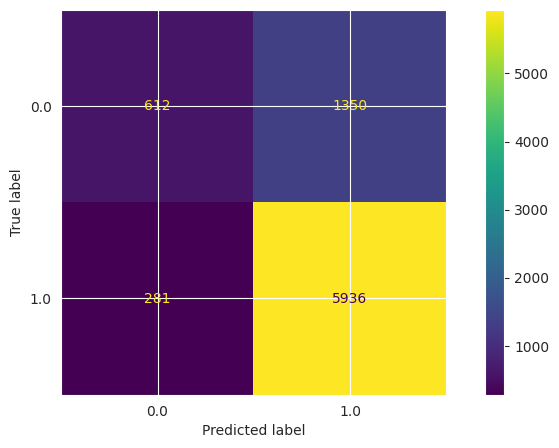

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)
# Por un error, lo hice anteriormente sin char_len y el true label predicted era 598. Ahora es 612. Vemos una leve mejoría del modelo

La predicción cuando cyberbuying es = 0 es pobre en relación a los falsos positivos

In [ ]:
model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [5, 2, 1.0, 0.8, 0.5]      # Pruebo otros cercanos al 1
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor accuracy: 0.802356 usando los parámetros {'C': 2, 'penalty': 'l2', 'solver': 'liblinear'}
[[ 605 1357]
 [ 271 5946]]
              precision    recall  f1-score   support

         0.0       0.69      0.31      0.43      1962
         1.0       0.81      0.96      0.88      6217

    accuracy                           0.80      8179
   macro avg       0.75      0.63      0.65      8179
weighted avg       0.78      0.80      0.77      8179



              precision    recall  f1-score   support

         0.0       0.67      0.33      0.44      1962
         1.0       0.82      0.95      0.88      6217

    accuracy                           0.80      8179
   macro avg       0.74      0.64      0.66      8179
weighted avg       0.78      0.80      0.77      8179



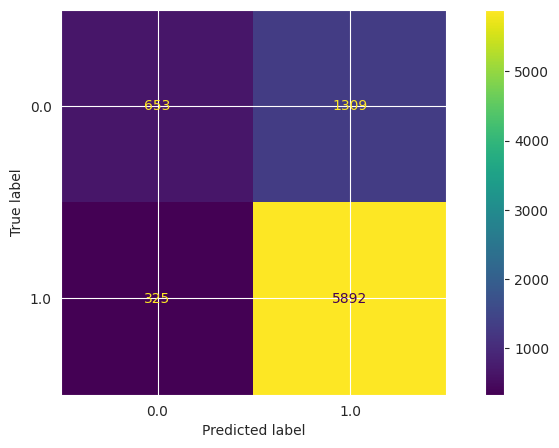

In [ ]:
model=LogisticRegression(C=2, penalty="l2", solver = "liblinear") # Estos son los parametros a cambiar tras cada iteración
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

Vemos una mejoría

In [ ]:
# Son muchos modificadores. La funcion tarda casi 5'
#Pruebo:
"""solvers = ['newton-cg', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet', None]
c_values = [3, 2.5, 2, 1,7, 1,4]
"""
model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet', None]   #Añado otros penalizadores
c_values = [3, 2.5, 2, 1,7, 1,4]             #Modifico la C cercana a 2
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor accuracy: 0.802764 usando los parámetros {'C': 2, 'penalty': 'l1', 'solver': 'liblinear'}


' model=LogisticRegression(C=0.8, penalty="l2", solver = "newton-cg") # <-- con 0.8\nmodel.fit(X_train,y_train)\n\ny_pred = model.predict(X_test)\n\nfrom sklearn.metrics import classification_report,confusion_matrix\nprint(confusion_matrix(y_test,y_pred))\nprint(classification_report(y_test,y_pred))\n '

              precision    recall  f1-score   support

         0.0       0.69      0.33      0.44      1962
         1.0       0.82      0.95      0.88      6217

    accuracy                           0.80      8179
   macro avg       0.75      0.64      0.66      8179
weighted avg       0.79      0.80      0.78      8179



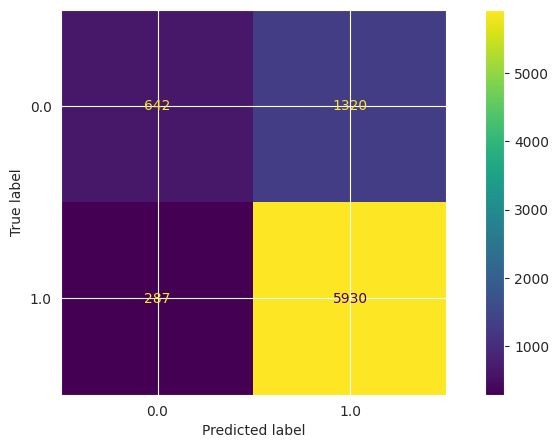

In [ ]:
model=LogisticRegression(C=2, penalty="l1", solver = "liblinear") # Cambio el penalty.
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

Observo más precision en target = 1 y menos precision en target = 0. Como target = 0 es el menos preciso me quedo con el modelo anterior:

model=LogisticRegression(C=2, penalty="l2", solver = "liblinear") # Cambio el penalty.

Al encontrar mejor recall encuentra el recall para cyberbullying = 1 lo que no vale.
Pregunto a chatgpt como puedo optimizar el recall para target = 0:

In [ ]:
from sklearn.metrics import make_scorer, recall_score

# Define una función de puntuación personalizada para el recall de la clase 0
scoring = make_scorer(recall_score, pos_label=0)

# Realiza la búsqueda de hiperparámetros con la nueva función de puntuación
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring, error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# Resumen de los resultados
print("Mejor recall para la clase 0: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor recall para la clase 0: 0.383114 usando los parámetros {'C': 3, 'penalty': None, 'solver': 'newton-cg'}


              precision    recall  f1-score   support

         0.0       0.65      0.37      0.47      1962
         1.0       0.82      0.94      0.88      6217

    accuracy                           0.80      8179
   macro avg       0.74      0.65      0.67      8179
weighted avg       0.78      0.80      0.78      8179



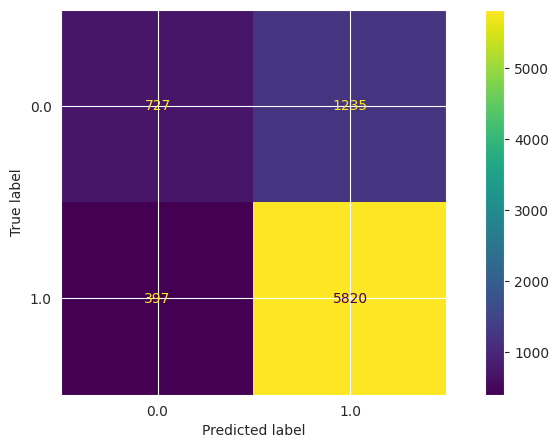

In [ ]:
# Pruebo estos parámetros bastante distintos

model=LogisticRegression(C=3, penalty="none", solver = "newton-cg") # Cambio el penalty.
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

In [ ]:
# Tarda 5'
# Me gusta el resultado. Voy a recalcular la C para valores más grandes:
solvers = ['newton-cg', 'liblinear'] # Pruebo los dos modelos
penalty = [None]                     # Quito todos para ahorrar tiempo
c_values = [20, 10, 7, 5, 3]         # Pruebo valores de C más grandes. El anterior modelo prefirió 3 sobre 2.5
scoring = make_scorer(recall_score, pos_label=0)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring, error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# Resumen de los resultados
print(grid_result.best_score_, grid_result.best_params_)

Mejor recall para la clase 0: 0.383114 usando los parámetros {'C': 3, 'penalty': None, 'solver': 'newton-cg'}


Nada ha cambiado. Mantendremos estos valores

              precision    recall  f1-score   support

         0.0       0.65      0.37      0.47      1962
         1.0       0.82      0.94      0.88      6217

    accuracy                           0.80      8179
   macro avg       0.74      0.65      0.67      8179
weighted avg       0.78      0.80      0.78      8179



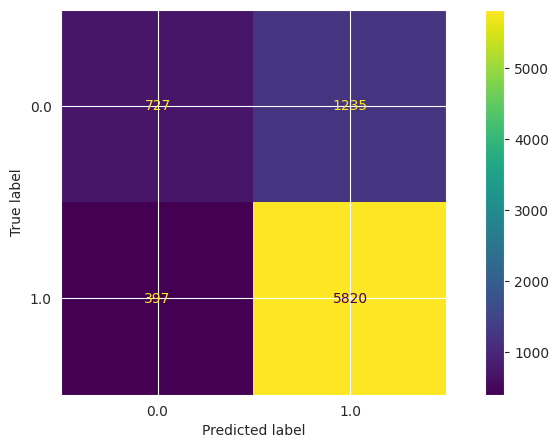

In [ ]:
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

Vemos una mejora del 2%, optimizo los hiperparametros

In [ ]:
from sklearn.metrics import make_scorer, recall_score

scoring = make_scorer(recall_score, pos_label=0)
solvers = ['newton-cg']
penalty = ['l1', 'l2', 'elasticnet', None]      # Para finalizar vuelvo a probar otros penalties.
c_values = [3]
# Realiza la búsqueda de hiperparámetros con la nueva función de puntuación
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring, error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# Resumen de los resultados
print("Mejor recall para la clase 0: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor recall para la clase 0: 0.383114 usando los parámetros {'C': 3, 'penalty': None, 'solver': 'newton-cg'}


Nada cambia

## Importancia de caracteristicas

In [ ]:
# Obtener la importancia de las variables del modelo
importance = model.coef_[0]
importance

array([ 6.99678709e-01,  7.14372071e-01,  1.74322910e-02,  5.41268948e+00,
        4.55965816e-01,  1.05896274e+00,  0.00000000e+00,  6.51172364e-01,
        0.00000000e+00,  0.00000000e+00,  2.67592218e+00,  5.28702221e-01,
       -1.42609099e-01,  1.89837174e+00,  6.71176274e-01,  1.38151595e+00,
        0.00000000e+00,  7.54714561e-01,  9.26160147e-01,  5.46032116e-01,
        1.90474847e+00,  3.98396738e-01,  1.60905578e-01,  9.64766259e-01,
        2.45040807e-01,  3.37484196e-01,  2.69291851e+00,  0.00000000e+00,
        8.82751170e-01, -5.75022555e-01,  3.96132918e-01, -2.99638519e-01,
       -2.13364494e-01,  5.66207719e-01,  4.99869516e+00,  1.43454588e+00,
        7.11841216e-01, -2.87760700e-01, -1.37108772e-01,  1.30689057e+01,
        5.16241098e-01,  3.30355039e+00, -3.32257850e+00,  1.58743787e+00,
        7.62287891e-02,  8.44072240e-01,  1.35662722e+00,  8.33113248e+00,
       -2.42412939e+00,  1.07156732e+01, -3.18037667e-01,  8.33865338e-01,
        9.00599872e-01, -

In [ ]:
# Primero, emparejamos los nombres de las características con su importancia
features_importances = list(zip(X_columns, importance))


# Luego, ordenamos las características por importancia en orden descendente
features_importances_sorted = sorted(features_importances, key=lambda x: x[1], reverse=True)
print(features_importances_sorted)

# Desempaquetamos las listas ordenadas
X_columns_sorted, importance_sorted = zip(*features_importances_sorted)

[('nigger', 29.31161367101033), ('feminazi', 15.097689025018466), ('bully high', 13.06890567964029), ('girl bully', 11.158412732812112), ('colored', 10.715673165268187), ('rape joke', 10.110583320966068), ('islamic terrorism', 9.26723046252407), ('girl high', 9.111690095234229), ('gay joke', 8.65981533958152), ('christian woman', 8.331132475996473), ('dumb fuck', 7.864330060902485), ('joke rape', 7.41614846071418), ('gay rape', 7.163366344040678), ('rape gay', 6.644356715816053), ('joke gay', 6.175311122969685), ('rt MENTION sexist', 5.739539231046915), ('school bully', 5.633070076582545), ('MENTION MENTION fuck', 5.412689477960479), ('dumb ass', 5.3704943401414695), ('notsexist', 5.3325786694046595), ('bitch', 4.998695160780065), ('high school', 4.905337882241644), ('middle school', 4.546374351115402), ('rape', 4.502084701579342), ('idiot', 4.137835938639258), ('make rape', 4.1144354095381726), ('dumb', 3.904853242702455), ('muslim', 3.7694219846015464), ('sexist', 3.5400674255883913)

Graficamos

Feature: 0, Name: nigger, Score: 29.31161
Feature: 1, Name: feminazi, Score: 15.09769
Feature: 2, Name: bully high, Score: 13.06891
Feature: 3, Name: girl bully, Score: 11.15841
Feature: 4, Name: colored, Score: 10.71567
Feature: 5, Name: rape joke, Score: 10.11058
Feature: 6, Name: islamic terrorism, Score: 9.26723
Feature: 7, Name: girl high, Score: 9.11169
Feature: 8, Name: gay joke, Score: 8.65982
Feature: 9, Name: christian woman, Score: 8.33113
Feature: 10, Name: dumb fuck, Score: 7.86433
Feature: 11, Name: joke rape, Score: 7.41615
Feature: 12, Name: gay rape, Score: 7.16337
Feature: 13, Name: rape gay, Score: 6.64436
Feature: 14, Name: joke gay, Score: 6.17531
Feature: 15, Name: num_URLS, Score: -0.50818
Feature: 16, Name: video, Score: -0.51477
Feature: 17, Name: okay, Score: -0.54165
Feature: 18, Name: back, Score: -0.57502
Feature: 19, Name: lie, Score: -0.58786
Feature: 20, Name: ya, Score: -0.60882
Feature: 21, Name: love, Score: -0.84298
Feature: 22, Name: shut fuck, Scor

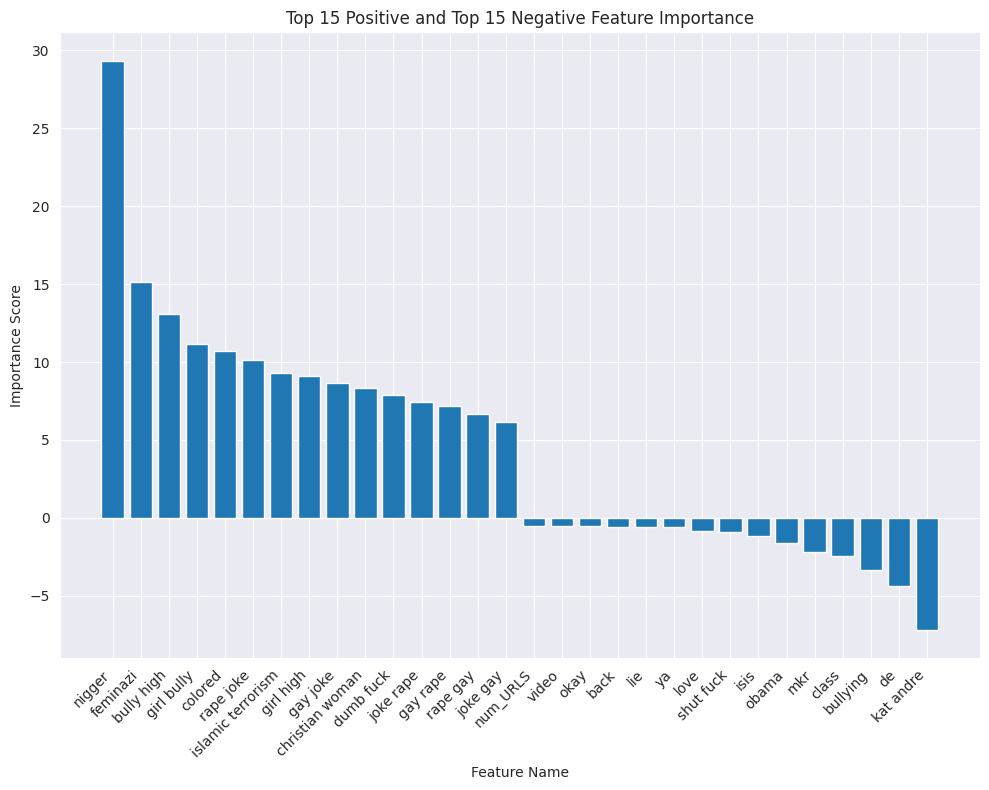

In [ ]:
# Seleccionamos solo las 15 más positivas y las 10 más negativas
top_features = X_columns_sorted[:15] + X_columns_sorted[-15:]
top_importance = importance_sorted[:15] + importance_sorted[-15:]

# Mostrar el número de la característica, con su nombre, y su score de importancia
for i, (feature, importance) in enumerate(zip(top_features, top_importance)):
    print('Feature: %0d, Name: %s, Score: %.5f' % (i, feature, importance))

# Crear el plot
plt.figure(figsize=(10, 8))  # Ajusta el tamaño del gráfico según necesites
plt.bar(top_features, top_importance)  # Usar nombres de características ordenadas en el eje x

# Mejorar el gráfico
plt.xticks(rotation=45, ha="right")  # Rota los nombres en el eje x para mejor lectura
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.title('Top 15 Positive and Top 15 Negative Feature Importance')
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot para que el subplot(s) encaje en el área de la figura.

plt.show()